# IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# LOADING DATASET FILE

In [4]:
df = pd.read_csv('C:/Users/pc/Desktop/KAGGLE DATA/Fake_Data.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


# EXPLORATORY DATA ANALYSIS

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [8]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
df=df.dropna()                 # DROPPING MISSING VALUES

In [10]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [11]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
df.shape

(71537, 4)

# DATA VISUALIZATION

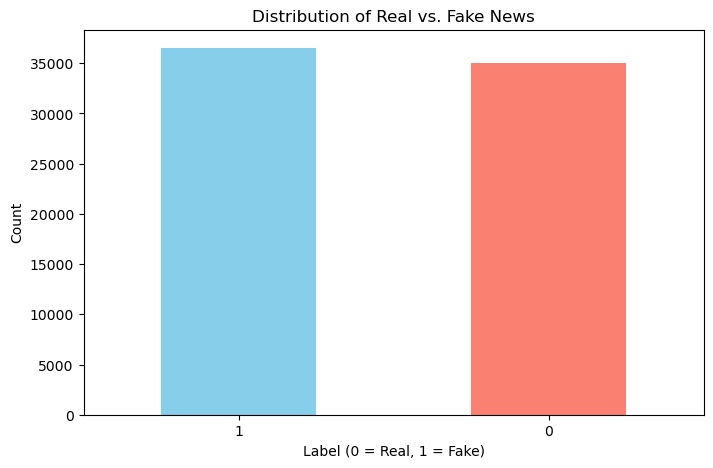

In [14]:
# Plotting the value counts of the 'label' column

plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Real vs. Fake News')
plt.xlabel('Label (0 = Real, 1 = Fake)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


 # TEXT PRE-PROCESSING

In [16]:
def pre_process(title):
    title = re.sub(r'[^a-zA-Z]',' ',title)    # REMOVING SPECIAL CHARACTERS
    title = re.sub(r'\s+',' ',title)          # REMOVING WHITE SPACES
    title = title.lower()                     # LOWERING ALL CHARACTERS
    return title
    

In [17]:
df['new_title'] = df['title'].apply(pre_process)         # MAKING NEW COLUMN
df['new_title']

C:\Users\pc\AppData\Local\Temp\ipykernel_27692\3264473085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_title'] = df['title'].apply(pre_process)         # MAKING NEW COLUMN


0        law enforcement on high alert following threat...
2        unbelievable obama s attorney general says mos...
3        bobby jindal raised hindu uses story of christ...
4        satan russia unvelis an image of its terrifyin...
5        about time christian group sues amazon and spl...
                               ...                        
72129    russians steal research on trump in hack of u ...
72130     watch giuliani demands that democrats apologi...
72131    migrants refuse to leave train at refugee camp...
72132    trump tussle gives unpopular mexican leader mu...
72133    goldman sachs endorses hillary clinton for pre...
Name: new_title, Length: 71537, dtype: object

In [18]:
ps = PorterStemmer()
def stemming(text):
    text = text.split()                                                       # SPLITTING THE STRING
    stop_words = stopwords.words('english')                                   # REMOVING STOPWORDS
    text = [ps.stem(word) for word in text if word not in stop_words]         # APPLYING PORTER STEMMING
    text = ' '.join(text)
    return text
df['new_title'] = df['new_title'].apply(stemming) 


C:\Users\pc\AppData\Local\Temp\ipykernel_27692\1315101986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_title'] = df['new_title'].apply(stemming)


In [19]:
df['new_title'][0:10]

0     law enforc high alert follow threat cop white ...
2     unbeliev obama attorney gener say charlott rio...
3     bobbi jindal rais hindu use stori christian co...
4     satan russia unv imag terrifi new supernuk wes...
5     time christian group sue amazon splc design ha...
6     dr ben carson target ir never audit spoke nati...
7     hous intel chair trump russia fake stori evid ...
8     sport bar owner ban nfl game show true america...
9     latest pipelin leak underscor danger dakota ac...
10     gop senat smack punchabl alt right nazi internet
Name: new_title, dtype: object

In [20]:
df = df.drop(['title','text'],axis=1)               # DROPPING UNNECESSARY COLUMNS
df                                              

,Unnamed: 0,label,new_title
0,0,1,law enforc high alert follow threat cop white ...
2,2,1,unbeliev obama attorney gener say charlott rio...
3,3,0,bobbi jindal rais hindu use stori christian co...
4,4,1,satan russia unv imag terrifi new supernuk wes...
5,5,1,time christian group sue amazon splc design ha...
...,...,...,...
72129,72129,0,russian steal research trump hack u democrat p...
72130,72130,1,watch giuliani demand democrat apolog trump ra...
72131,72131,0,migrant refus leav train refuge camp hungari
72132,72132,0,trump tussl give unpopular mexican leader much...


# TRANSFORMING AND PREDICTING DATA

In [22]:
x = df['new_title']
x

0        law enforc high alert follow threat cop white ...
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
5        time christian group sue amazon splc design ha...
                               ...                        
72129    russian steal research trump hack u democrat p...
72130    watch giuliani demand democrat apolog trump ra...
72131         migrant refus leav train refuge camp hungari
72132    trump tussl give unpopular mexican leader much...
72133           goldman sach endors hillari clinton presid
Name: new_title, Length: 71537, dtype: object

In [23]:
y = df['label']
y

0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64

In [24]:
vector = TfidfVectorizer()
vector = vector.fit(x)
x = vector.transform(x)


In [25]:
x.shape

(71537, 19489)

In [26]:
y.shape

(71537,)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,stratify = y,random_state=20)

In [28]:
x_train.shape

(57229, 19489)

In [29]:
x_test.shape

(14308, 19489)

In [30]:
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
lr

LogisticRegression()

In [31]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [32]:
lr.score(x_train,y_train)

0.921787904733614

In [33]:
lr.score(x_test,y_test)

0.8949538719597429

In [34]:
# USER INPUT PREDICTION TIME 

def indexchecking():
    try:
        def data_testing():
             prediction = x_test[int(input('Enter the index number:'))]
             prediction = lr.predict(prediction)
             if prediction==1:
                 print('REAL NEWS')
             else:
                 print('FAKE NEWS') 
        data_testing()          
    except IndexError as err:
        print("ERROR:",err)
        print("HINT:Enter the index from 0 to",x_test.shape)
    except ValueError as ve:
        print("ERROR:",ve)
        print("HINT:Enter index number not special characters")
    except Exception as e:
        print("ERROR:",e)
    finally:
        print("RE-RUN THE CELL TO CHECK OTHER INDEX")

        
indexchecking()

    
# 0 = FAKE NEWS 
# 1 = REAL NEWS

Enter the index number: 5600


FAKE NEWS
RE-RUN THE CELL TO CHECK OTHER INDEX
